In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [3]:
data = pd.read_csv('Datasets/KDDTrain+_20Percent.csv')
test = pd.read_csv('Datasets/KDDTest-21.csv')
data.head()

Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_fragment  Urgent  Hot  ...  Dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   Dst_host_diff_srv_rate  Dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   Dst_host_srv_diff_host_rate  Dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   Dst_host_srv_serror_rate  Dst_host_rerror_rate  Dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   attack_type  difficulty_level  
0       normal                15  
1      neptune                19  
2       normal                21  
3       normal                21  
4      neptune                21  

[5 rows x 43 columns]

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration                     25191 non-null  int64  
 1   Protocol_type                25191 non-null  object 
 2   Service                      25191 non-null  object 
 3   Flag                         25191 non-null  object 
 4   Src_bytes                    25191 non-null  int64  
 5   Dst_bytes                    25191 non-null  int64  
 6   Land                         25191 non-null  int64  
 7   Wrong_fragment               25191 non-null  int64  
 8   Urgent                       25191 non-null  int64  
 9   Hot                          25191 non-null  int64  
 10  Num_failed_logins            25191 non-null  int64  
 11  Logged_in                    25191 non-null  int64  
 12  Num_compromised              25191 non-null  int64  
 13  Root_shell      

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration                     11850 non-null  int64  
 1   Protocol_type                11850 non-null  object 
 2   Service                      11850 non-null  object 
 3   Flag                         11850 non-null  object 
 4   Src_bytes                    11850 non-null  int64  
 5   Dst_bytes                    11850 non-null  int64  
 6   Land                         11850 non-null  int64  
 7   Wrong_fragment               11850 non-null  int64  
 8   Urgent                       11850 non-null  int64  
 9   Hot                          11850 non-null  int64  
 10  Num_failed_logins            11850 non-null  int64  
 11  Logged_in                    11850 non-null  int64  
 12  Num_compromised              11850 non-null  int64  
 13  Root_shell      

### Preprocessing

In [89]:
train_dataset = data.copy()
test_dataset = test.copy()

In [90]:
difficulty_level_train = train_dataset['difficulty_level']
train_dataset.drop(columns= ['difficulty_level'], inplace=True)

difficulty_level_test = test_dataset['difficulty_level']
test_dataset.drop(columns= ['difficulty_level'], inplace=True)

In [91]:
train_dataset

Duration Protocol_type   Service  Flag  Src_bytes  Dst_bytes  Land  \
0             0           udp     other    SF        146          0     0   
1             0           tcp   private    S0          0          0     0   
2             0           tcp      http    SF        232       8153     0   
3             0           tcp      http    SF        199        420     0   
4             0           tcp   private   REJ          0          0     0   
...         ...           ...       ...   ...        ...        ...   ...   
25186         0           tcp      exec  RSTO          0          0     0   
25187         0           tcp  ftp_data    SF        334          0     0   
25188         0           tcp   private   REJ          0          0     0   
25189         0           tcp      nnsp    S0          0          0     0   
25190         0           tcp    finger    S0          0          0     0   

       Wrong_fragment  Urgent  Hot  ...  Dst_host_srv_count  \
0                   0       0    0  ...                   1   
1                   0       0    0  ...                  26   
2                   0       0    0  ...                 255   
3                   0       0    0  ...                 255   
4                   0       0    0  ...                  19   
...               ...     ...  ...  ...                 ...   
25186               0       0    0  ...                   7   
25187               0       0    0  ...                  39   
25188               0       0    0  ...                  13   
25189               0       0    0  ...                  20   
25190               0       0    0  ...                  49   

       Dst_host_same_srv_rate  Dst_host_diff_srv_rate  \
0                        0.00                    0.60   
1                        0.10                    0.05   
2                        1.00                    0.00   
3                        1.00                    0.00   
4                        0.07                    0.07   
...                       ...                     ...   
25186                    0.03                    0.06   
25187                    1.00                    0.00   
25188                    0.05                    0.07   
25189                    0.08                    0.06   
25190                    0.19                    0.03   

       Dst_host_same_src_port_rate  Dst_host_srv_diff_host_rate  \
0                             0.88                         0.00   
1                             0.00                         0.00   
2                             0.03                         0.04   
3                             0.00                         0.00   
4                             0.00                         0.00   
...                            ...                          ...   
25186                         0.00                         0.00   
25187                         1.00                         0.18   
25188                         0.00                         0.00   
25189                         0.00                         0.00   
25190                         0.01                         0.00   

       Dst_host_serror_rate  Dst_host_srv_serror_rate  Dst_host_rerror_rate  \
0                      0.00                      0.00                   0.0   
1                      1.00                      1.00                   0.0   
2                      0.03                      0.01                   0.0   
3                      0.00                      0.00                   0.0   
4                      0.00                      0.00                   1.0   
...                     ...                       ...                   ...   
25186                  0.00                      0.00                   1.0   
25187                  0.00                      0.00                   0.0   
25188                  0.00                      0.00                   1.0   
25189                  1.00                  

In [92]:
categorical_cols = ['Protocol_type', 'Service', 'Flag']
binary_cols = ['Land', 'Logged_in', 'Root_shell', 'Su_attempted', 'Is_hot_login', 'Is_guest_login']
target = ['attack_type']
non_numerical_cols = binary_cols + categorical_cols + target
numerical_cols = [col for col in train_dataset.columns if col not in non_numerical_cols ]

In [93]:
numerical_cols

['Duration',
 'Src_bytes',
 'Dst_bytes',
 'Wrong_fragment',
 'Urgent',
 'Hot',
 'Num_failed_logins',
 'Num_compromised',
 'Num_root',
 'Num_file_creations',
 'Num_shells',
 'Num_access_files',
 'Num_outbound_cmds',
 'Count',
 'Srv_count',
 'Serror_rate',
 'Srv_serror_rate',
 'Rerror_rate',
 'Srv_rerror_rate',
 'Same_srv_rate',
 'Diff_srv_rate',
 'Srv_diff_host_rate',
 'Dst_host_count',
 'Dst_host_srv_count',
 'Dst_host_same_srv_rate',
 'Dst_host_diff_srv_rate',
 'Dst_host_same_src_port_rate',
 'Dst_host_srv_diff_host_rate',
 'Dst_host_serror_rate',
 'Dst_host_srv_serror_rate',
 'Dst_host_rerror_rate',
 'Dst_host_srv_rerror_rate']

#### Encoding

In [94]:
for col in categorical_cols: 
    print(f'-------- Column {col} --------')
    print(train_dataset[col].value_counts())
    print('')
    

-------- Column Protocol_type --------
tcp     20525
udp      3011
icmp     1655
Name: Protocol_type, dtype: int64

-------- Column Service --------
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1395
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: Service, Length: 66, dtype: int64

-------- Column Flag --------
SF        14972
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: Flag, dtype: int64



In [95]:
# Initialize One-Hot Encoder
encoder = OneHotEncoder(handle_unknown="ignore")

## Protocol type
# Fit encoder on training data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.fit_transform(train_dataset[["Protocol_type"]]).toarray())
data_ohe.columns = [("Protocol_type_" + col) for col in encoder.categories_[0]]

# Join encoded data with original training data
train_dataset = pd.concat([train_dataset, data_ohe], axis=1)

# Transform test data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.transform(test_dataset[["Protocol_type"]]).toarray())
data_ohe.columns = [("Protocol_type_" + col) for col in encoder.categories_[0]]

# Join encoded data with original test data
test_dataset = pd.concat([test_dataset, data_ohe], axis=1)

## Flag
# Fit encoder on training data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.fit_transform(train_dataset[["Flag"]]).toarray())
data_ohe.columns = [("Flag_" + col) for col in encoder.categories_[0]]

# Join encoded data with original training data
train_dataset = pd.concat([train_dataset, data_ohe], axis=1)

# Transform test data (returns a separate DataFrame)
data_ohe = pd.DataFrame(encoder.transform(test_dataset[["Flag"]]).toarray())
data_ohe.columns = [("Flag_" + col) for col in encoder.categories_[0]]

# Join encoded data with original test data
test_dataset = pd.concat([test_dataset, data_ohe], axis=1)

# Fit Frequency encoder on training data
encoder = ce.CountEncoder(cols="Service", normalize=True)

train_dataset["Service_encoded"] = encoder.fit_transform(train_dataset["Service"])
test_dataset["Service_encoded"] = encoder.transform(test_dataset["Service"])

In [96]:
train_dataset['Service_encoded'].value_counts()


0.317693    8003
0.172720    4351
0.072248    1820
0.057521    1449
0.055377    1395
0.036084     909
0.034060     858
0.024334     613
0.019174     483
0.014529     366
0.013695     345
0.004327     218
0.004248     214
0.002660     201
0.007503     189
0.003652     184
0.003573     180
0.006828     172
0.003374     170
0.006510     164
0.006232     157
0.006153     155
0.005796     146
0.005756     145
0.005478     138
0.005280     133
0.005200     131
0.005041     127
0.004922     124
0.004883     123
0.004525     114
0.004486     113
0.004406     111
0.004367     110
0.004168     105
0.003811      96
0.003612      91
0.003493      88
0.003136      79
0.003096      78
0.003017      76
0.002580      65
0.002421      61
0.002302      58
0.002104      53
0.001826      46
0.001588      40
0.000675      34
0.001270      32
0.000873      22
0.000794      20
0.000476      12
0.000437      11
0.000119       6
0.000159       4
0.000079       2
0.000040       1
Name: Service_encoded, dtype: i

In [97]:
# Target Encoding
#Mapping all attack types to their categories
dos_attacks = ['back','land','neptune','pod','smurf','teardrop', 'Apache2', 'udpstorm', 'Processtable', 'worm']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'Mscan', 'Saint']
R2L_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'Xlock', 'Xsnoop', 'Snmpguess', 'Snmpgetattack', 'Httptunnel', 'Sendmail', 'Named']
U2R_attacks = ['rootkit', 'buffer_overflow', 'loadmodule', 'Perl', 'Sqlattack', 'Xterm', 'Ps']

def attack_category(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in R2L_attacks:
        attack_type = 3
    elif attack in U2R_attacks:
        attack_type = 4
    else:
        attack_type = 0
    return attack_type

train_dataset['attack_category'] = train_dataset['attack_type'].apply(attack_category)
train_dataset.loc[train_dataset['attack_category'] > 0, 'is_attack'] = 1
train_dataset.loc[train_dataset['attack_category'] == 0, 'is_attack'] = 0

test_dataset['attack_category'] = test_dataset['attack_type'].apply(attack_category)
test_dataset.loc[test_dataset['attack_category'] > 0, 'is_attack'] = 1
test_dataset.loc[test_dataset['attack_category'] == 0, 'is_attack'] = 0

In [98]:
train_dataset['is_attack']

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
25186    1.0
25187    1.0
25188    1.0
25189    1.0
25190    1.0
Name: is_attack, Length: 25191, dtype: float64

In [99]:
train_dataset['attack_type'].value_counts()


normal             13448
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
land                   1
loadmodule             1
spy                    1
Name: attack_type, dtype: int64

In [100]:
train_dataset['attack_category'].value_counts()

0    13448
1     9234
2     2289
3      209
4       11
Name: attack_category, dtype: int64

#### Scaling

In [101]:
numerical_cols

['Duration',
 'Src_bytes',
 'Dst_bytes',
 'Wrong_fragment',
 'Urgent',
 'Hot',
 'Num_failed_logins',
 'Num_compromised',
 'Num_root',
 'Num_file_creations',
 'Num_shells',
 'Num_access_files',
 'Num_outbound_cmds',
 'Count',
 'Srv_count',
 'Serror_rate',
 'Srv_serror_rate',
 'Rerror_rate',
 'Srv_rerror_rate',
 'Same_srv_rate',
 'Diff_srv_rate',
 'Srv_diff_host_rate',
 'Dst_host_count',
 'Dst_host_srv_count',
 'Dst_host_same_srv_rate',
 'Dst_host_diff_srv_rate',
 'Dst_host_same_src_port_rate',
 'Dst_host_srv_diff_host_rate',
 'Dst_host_serror_rate',
 'Dst_host_srv_serror_rate',
 'Dst_host_rerror_rate',
 'Dst_host_srv_rerror_rate']

In [102]:
# Scaling numerical variables with Standard Scaler
scaler = StandardScaler()
train_dataset[[(col + "_scaled") for col in numerical_cols]] = scaler.fit_transform(train_dataset[numerical_cols])
test_dataset[[(col + "_scaled") for col in numerical_cols]] = scaler.transform(test_dataset[numerical_cols])

In [103]:
train_dataset.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'attack_type', 'Protocol_type_icmp',
       'Protocol_type_tcp', 'Protocol_type_udp', 'Flag_OTH', 'Flag_REJ',
       'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_S0', 'Flag_S1',
  

In [104]:
test_dataset.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'attack_type', 'Protocol_type_icmp',
       'Protocol_type_tcp', 'Protocol_type_udp', 'Flag_OTH', 'Flag_REJ',
       'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_S0', 'Flag_S1',
  

### PCA

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
# Generate PCA components on training data
pca = PCA(0.90)

pca_features_train = pca.fit_transform(train_dataset[[(col + '_scaled') for col in numerical_cols]])

pca_features_train_df = pd.DataFrame(pca_features_train)
pca_features_train_df.columns = ['PCA' + str(i) for i in range(1,len(pca_features_train[0]) + 1)]
train_dataset = pd.concat([train_dataset, pca_features_train_df], axis=1)

# Transform test data
pca_features_test = pca.transform(test_dataset[[(col + '_scaled') for col in numerical_cols]])

pca_features_test_df = pd.DataFrame(pca_features_test)
pca_features_test_df.columns = ['PCA' + str(i) for i in range(1,len(pca_features_test[0]) + 1)]
test_dataset = pd.concat([test_dataset, pca_features_test_df], axis=1)

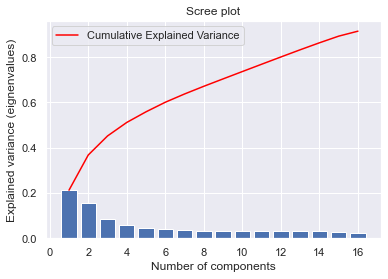

In [107]:
sns.set()
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )

plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

In [108]:
import plotly.express as px

total_var = pca.explained_variance_ratio_[0:3].sum()
fig = px.scatter_3d(
    [row[0:3] for row in pca_features], x=0, y=1, z=2, color=train_dataset['is_attack'].astype('category'),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.show()

In [109]:
import plotly.express as px

total_var = pca.explained_variance_ratio_[0:3].sum()
fig = px.scatter_3d(
    [row[0:3] for row in pca_features], x=0, y=1, z=2, color=train_dataset['attack_category'].astype('category'),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.show()

In [110]:
loadings_pca1 = np.absolute(pca.components_[0])
index = np.argsort(np.absolute(loadings_pca1))
values = np.sort(np.absolute(loadings_pca1))
print("Loadings of PCA:", loadings_pca1)

Loadings of PCA: [0.01073707 0.002053   0.01117046 0.01082651 0.00051789 0.01629877
 0.00444349 0.00645279 0.00646454 0.00155307 0.0047855  0.01264812
 0.         0.2432087  0.047214   0.35490751 0.35386818 0.00783402
 0.00741857 0.35504398 0.10074601 0.14334904 0.2304041  0.28566344
 0.32674751 0.07000499 0.12560912 0.11668912 0.35628378 0.35615494
 0.00652567 0.00870491]


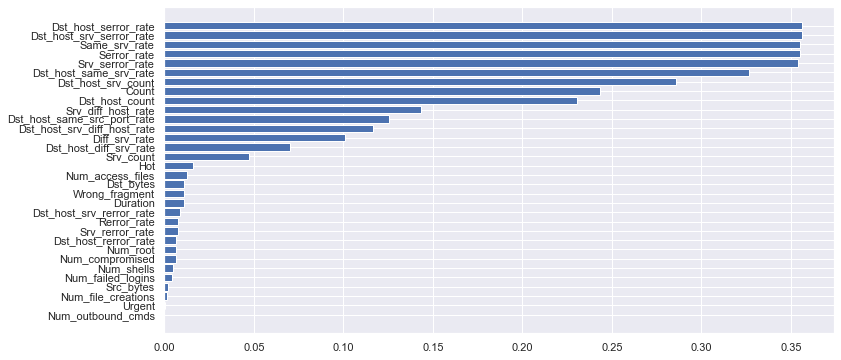

In [111]:
fig = plt.figure(figsize = [12, 6])
plt.barh(
    range(1,len(numerical_cols)+1),
    values,
    tick_label = [numerical_cols[ind] for ind in index ]
    )
plt.show()


In [112]:
train_dataset.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       ...
       'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14',
       'PCA15', 'PCA16'],
      dtype='object', length=107)

In [113]:
test_dataset.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       ...
       'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14',
       'PCA15', 'PCA16'],
      dtype='object', length=107)

In [114]:
set(train_dataset.columns) - set(test_dataset.columns)

set()

In [118]:
final_cols_no_pca = ['Land', 'Logged_in', 'Root_shell', 'Su_attempted', 'Is_hot_login', 'Is_guest_login', 'Protocol_type_icmp',
       'Protocol_type_tcp', 'Protocol_type_udp', 'Flag_OTH', 'Flag_REJ',
       'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_S0', 'Flag_S1',
       'Flag_S2', 'Flag_S3', 'Flag_SF', 'Flag_SH', 'Service_encoded',
       'Duration_scaled', 'Src_bytes_scaled',
       'Dst_bytes_scaled', 'Wrong_fragment_scaled', 'Urgent_scaled',
       'Hot_scaled', 'Num_failed_logins_scaled', 'Num_compromised_scaled',
       'Num_root_scaled', 'Num_file_creations_scaled', 'Num_shells_scaled',
       'Num_access_files_scaled', 'Num_outbound_cmds_scaled', 'Count_scaled',
       'Srv_count_scaled', 'Serror_rate_scaled', 'Srv_serror_rate_scaled',
       'Rerror_rate_scaled', 'Srv_rerror_rate_scaled', 'Same_srv_rate_scaled',
       'Diff_srv_rate_scaled', 'Srv_diff_host_rate_scaled',
       'Dst_host_count_scaled', 'Dst_host_srv_count_scaled',
       'Dst_host_same_srv_rate_scaled', 'Dst_host_diff_srv_rate_scaled',
       'Dst_host_same_src_port_rate_scaled',
       'Dst_host_srv_diff_host_rate_scaled', 'Dst_host_serror_rate_scaled',
       'Dst_host_srv_serror_rate_scaled', 'Dst_host_rerror_rate_scaled',
       'Dst_host_srv_rerror_rate_scaled']

final_cols_pca = ['Land', 'Logged_in', 'Root_shell', 'Su_attempted', 'Is_hot_login', 'Is_guest_login', 'Protocol_type_icmp',
       'Protocol_type_tcp', 'Protocol_type_udp', 'Flag_OTH', 'Flag_REJ',
       'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_S0', 'Flag_S1',
       'Flag_S2', 'Flag_S3', 'Flag_SF', 'Flag_SH', 'Service_encoded'] + ['PCA' + str(i) for i in range(1,len(pca_features[0]) + 1)]

In [119]:
X_train_no_pca = train_dataset[final_cols_no_pca]
# attack = 1, normal = 0
y_train_no_pca_is_attack = train_dataset['is_attack']
# attack_category 0 (normal),1 (dos),2 (probe),3 (r2l),4 (u2r)
y_train_no_pca_attack_cat = train_dataset['attack_category']

X_test_no_pca = test_dataset[final_cols_no_pca]
# attack = 1, normal = 0
y_test_no_pca_is_attack = test_dataset['is_attack']
# attack_category 0 (normal),1 (dos),2 (probe),3 (r2l),4 (u2r)
y_test_no_pca_attack_cat = test_dataset['attack_category']


In [120]:
X_train_pca = train_dataset[final_cols_pca]
# attack = 1, normal = 0
y_train_pca_is_attack = train_dataset['is_attack']
# attack_category 0 (normal),1 (dos),2 (probe),3 (r2l),4 (u2r)
y_train_pca_attack_cat = train_dataset['attack_category']

X_test_pca = test_dataset[final_cols_pca]
# attack = 1, normal = 0
y_test_pca_is_attack = test_dataset['is_attack']
# attack_category 0 (normal),1 (dos),2 (probe),3 (r2l),4 (u2r)
y_test_pca_attack_cat = test_dataset['attack_category']